In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import PIL

Using TensorFlow backend.


In [2]:
 tf.__version__

'2.4.0-dev20201019'

In [3]:
#!unzip -q All_Time_Artist.zip

In [12]:
!ls images

Albrecht_Dürer            Frida_Kahlo               Pablo_Picasso
Albrecht_Du╠êrer          Georges_Seurat            Paul_Cezanne
Alfred_Sisley             Giotto_di_Bondone         Paul_Gauguin
Amedeo_Modigliani         Gustav_Klimt              Paul_Klee
Andrei_Rublev             Gustave_Courbet           Peter_Paul_Rubens
Andy_Warhol               Henri_Matisse             Pierre-Auguste_Renoir
Camille_Pissarro          Henri_Rousseau            Piet_Mondrian
Caravaggio                Henri_de_Toulouse-Lautrec Pieter_Bruegel
Claude_Monet              Hieronymus_Bosch          Raphael
Diego_Rivera              Jackson_Pollock           Rembrandt
Diego_Velazquez           Jan_van_Eyck              Rene_Magritte
Edgar_Degas               Joan_Miro                 Salvador_Dali
Edouard_Manet             Kazimir_Malevich          Sandro_Botticelli
Edvard_Munch              Leonardo_da_Vinci         Titian
El_Greco                  Marc_Chagall              Vasiliy_Kandinskiy
Eugene_Dela

In [5]:
import os

#Images_Dir ='/Users/olaoluwa/Documents/PGD/PROJECTS/Machine Learning2/Data Used/images'
num_skipped = 0
Label= ["Albrecht_Du╠êrer","Frida_Kahlo", "Pablo_Picasso", "Albrecht_Du╠êrer", 
                    "Georges_Seurat", "Paul_Cezanne", "Alfred_Sisley", "Giotto_di_Bondone", 
                    "Paul_Gauguin", "Amedeo_Modigliani", "Gustav_Klimt", "Paul_Klee", "Andrei_Rublev", 
                    "Gustave_Courbet", "Peter_Paul_Rubens", "Andy_Warhol", "Henri_Matisse", 
                    "Pierre-Auguste_Renoir", "Camille_Pissarro", "Henri_Rousseau", "Piet_Mondrian", 
                    "Caravaggio", "Henri_de_Toulouse-Lautrec", "Pieter_Bruegel", "Claude_Monet", 
                    "Hieronymus_Bosch", "Raphael", "Diego_Rivera", "Jackson_Pollock", "Rembrandt", 
                    "Diego_Velazquez", "Jan_van_Eyck", "Rene_Magritte", "Edgar_Degas", "Joan_Miro", 
                    "Salvador_Dali", "Edouard_Manet", "Kazimir_Malevich", "Sandro_Botticelli", 
                    "Edvard_Munch", "Leonardo_da_Vinci", "Titian", "El_Greco", "Marc_Chagall", 
                    "Vasiliy_Kandinskiy", "Eugene_Delacroix", "Michelangelo", "Vincent_van_Gogh", 
                    "Francisco_Goya", "Mikhail_Vrubel", "William_Turner"]





In [6]:
for folder_name in Label: 
    folder_path = os.path.join("images", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            #Delete corrupted image
           

print("delete %d images" % num_skipped)

delete 8771 images


In [7]:
Art=!ls images

Art

['Albrecht_Dürer',
 'Albrecht_Du╠êrer',
 'Alfred_Sisley',
 'Amedeo_Modigliani',
 'Andrei_Rublev',
 'Andy_Warhol',
 'Camille_Pissarro',
 'Caravaggio',
 'Claude_Monet',
 'Diego_Rivera',
 'Diego_Velazquez',
 'Edgar_Degas',
 'Edouard_Manet',
 'Edvard_Munch',
 'El_Greco',
 'Eugene_Delacroix',
 'Francisco_Goya',
 'Frida_Kahlo',
 'Georges_Seurat',
 'Giotto_di_Bondone',
 'Gustav_Klimt',
 'Gustave_Courbet',
 'Henri_Matisse',
 'Henri_Rousseau',
 'Henri_de_Toulouse-Lautrec',
 'Hieronymus_Bosch',
 'Jackson_Pollock',
 'Jan_van_Eyck',
 'Joan_Miro',
 'Kazimir_Malevich',
 'Leonardo_da_Vinci',
 'Marc_Chagall',
 'Michelangelo',
 'Mikhail_Vrubel',
 'Pablo_Picasso',
 'Paul_Cezanne',
 'Paul_Gauguin',
 'Paul_Klee',
 'Peter_Paul_Rubens',
 'Pierre-Auguste_Renoir',
 'Piet_Mondrian',
 'Pieter_Bruegel',
 'Raphael',
 'Rembrandt',
 'Rene_Magritte',
 'Salvador_Dali',
 'Sandro_Botticelli',
 'Titian',
 'Vasiliy_Kandinskiy',
 'Vincent_van_Gogh',
 'William_Turner']

In [13]:
Images = tf.keras.preprocessing.image_dataset_from_directory("images")

Found 8774 files belonging to 51 classes.


In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

In [9]:
batch_size = 36
input_shape = (224,224,3)

vgg = VGG16(input_shape = (224,224,3), 
            weights = 'imagenet', include_top = False)



train_ds=ImageDataGenerator(rescale=1./255.)
val_ds=ImageDataGenerator(rescale=1./255.)
test_ds=ImageDataGenerator(rescale=1./255.)

train_ds = ImageDataGenerator(
    validation_split =0.2,
    rescale=1./255,
    rotation_range=45,
    horizontal_flip=True,
    vertical_flip =True,
    
)

train_generator=train_ds.flow_from_directory(
    directory="/Users/olaoluwa/Documents/PGD/PROJECTS/Machine Learning2/Data Used/split/train",
    batch_size=batch_size,
    seed=1337,
    shuffle=True,
    class_mode="categorical",
    target_size=input_shape[0:2]

    
)

valid_generator=val_ds.flow_from_directory(
    directory="/Users/olaoluwa/Documents/PGD/PROJECTS/Machine Learning2/Data Used/split/val",
    batch_size=batch_size,
    seed=1337,
    shuffle=True,
    class_mode="categorical",
    target_size=input_shape[0:2]
)

test_generator=train_ds.flow_from_directory(
    directory="/Users/olaoluwa/Documents/PGD/PROJECTS/Machine Learning2/Data Used/split/test",
    batch_size=1,
    seed=1234,
    shuffle=False,
    class_mode=None
)
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size 
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size 
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)



Found 6997 images belonging to 51 classes.
Found 2585 images belonging to 51 classes.
Found 1800 images belonging to 51 classes.
Total number of batches = 194 and 71


In [10]:
train_generator.class_indices

{'Albrecht_Dürer': 0,
 'Albrecht_Du╠êrer': 1,
 'Alfred_Sisley': 2,
 'Amedeo_Modigliani': 3,
 'Andrei_Rublev': 4,
 'Andy_Warhol': 5,
 'Camille_Pissarro': 6,
 'Caravaggio': 7,
 'Claude_Monet': 8,
 'Diego_Rivera': 9,
 'Diego_Velazquez': 10,
 'Edgar_Degas': 11,
 'Edouard_Manet': 12,
 'Edvard_Munch': 13,
 'El_Greco': 14,
 'Eugene_Delacroix': 15,
 'Francisco_Goya': 16,
 'Frida_Kahlo': 17,
 'Georges_Seurat': 18,
 'Giotto_di_Bondone': 19,
 'Gustav_Klimt': 20,
 'Gustave_Courbet': 21,
 'Henri_Matisse': 22,
 'Henri_Rousseau': 23,
 'Henri_de_Toulouse-Lautrec': 24,
 'Hieronymus_Bosch': 25,
 'Jackson_Pollock': 26,
 'Jan_van_Eyck': 27,
 'Joan_Miro': 28,
 'Kazimir_Malevich': 29,
 'Leonardo_da_Vinci': 30,
 'Marc_Chagall': 31,
 'Michelangelo': 32,
 'Mikhail_Vrubel': 33,
 'Pablo_Picasso': 34,
 'Paul_Cezanne': 35,
 'Paul_Gauguin': 36,
 'Paul_Klee': 37,
 'Peter_Paul_Rubens': 38,
 'Pierre-Auguste_Renoir': 39,
 'Piet_Mondrian': 40,
 'Pieter_Bruegel': 41,
 'Raphael': 42,
 'Rembrandt': 43,
 'Rene_Magritte': 44

# Visualize the data

Here are the first 25 images in the training dataset. As you can see, label
In [13]:


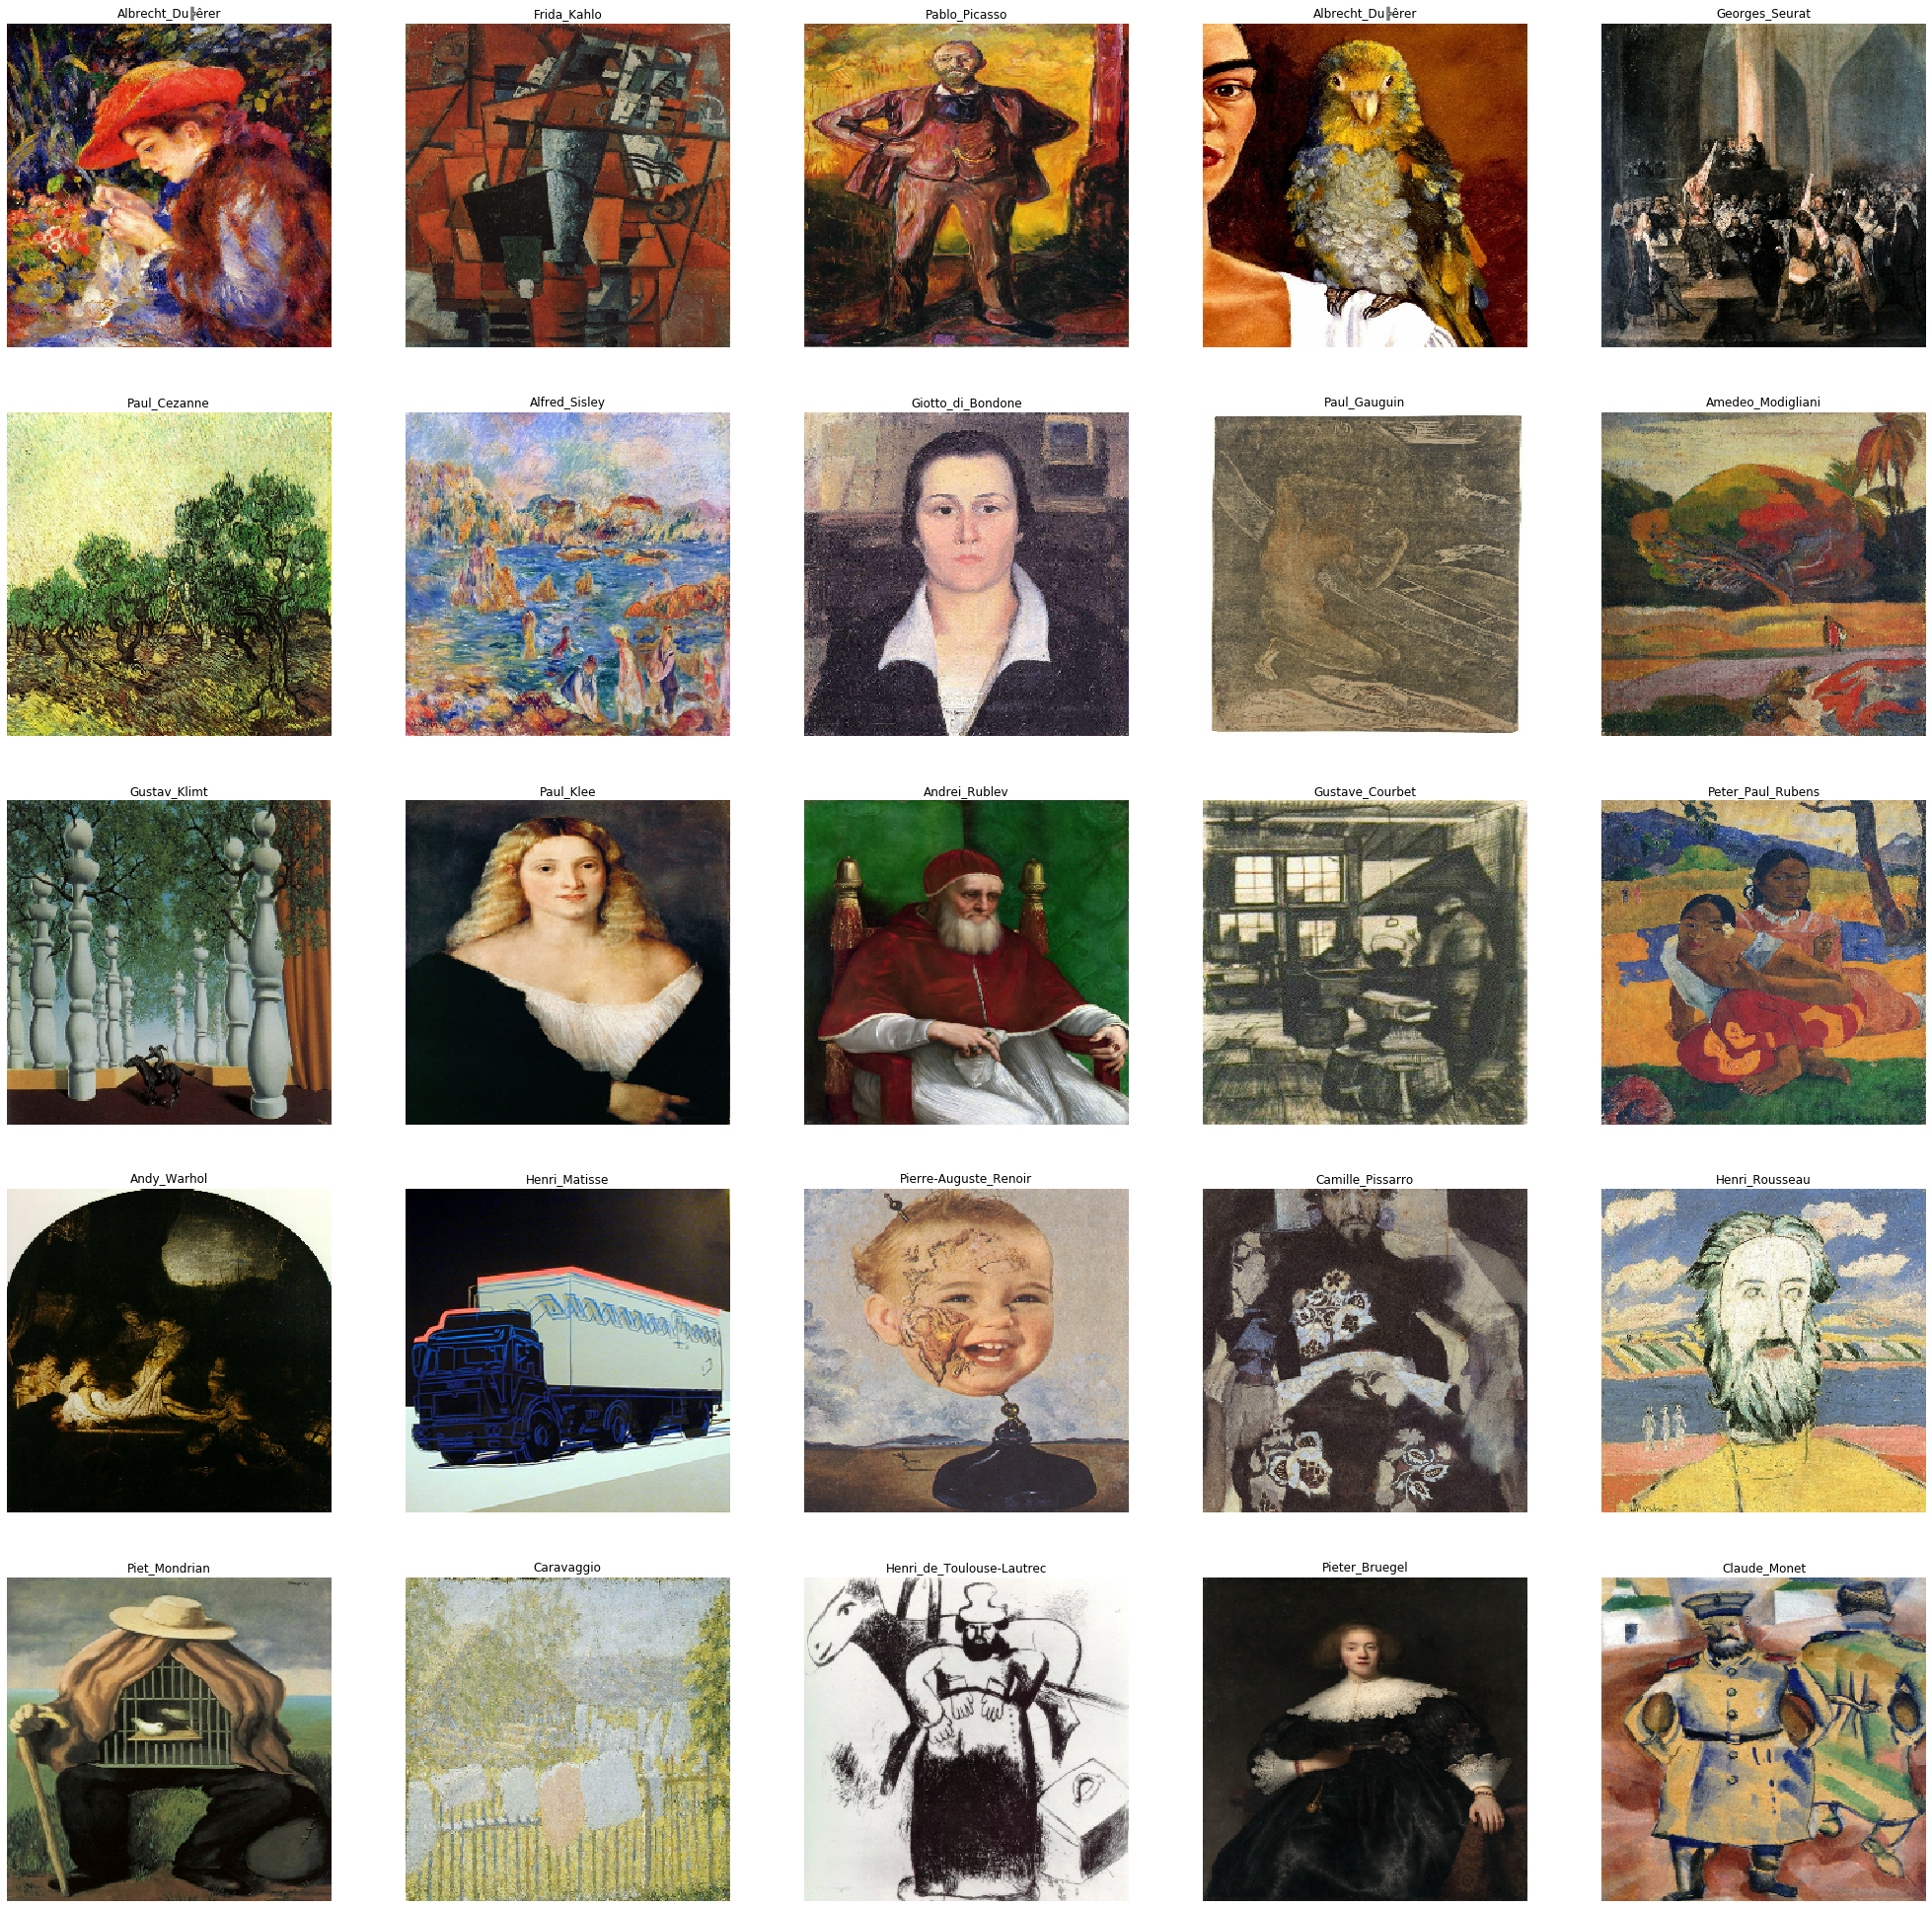

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(35,35))
for images, labels in Images.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(Label[i])
        plt.axis("off")

# Image augmentation

When you don't have a large image dataset, it's good practice to artificially introduce sample diversity by applying random yet realistic transformations to the training images such as random horizontal flipping or small random rotations. This helps expose the model to different aspects of the training data while slowing down overfitting

In [15]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(36, 224, 224, 3)
(36, 51)


In [16]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.2), 
    layers.experimental.preprocessing.RandomTranslation(0.3,0.2), 
    layers.experimental.preprocessing.RandomContrast(0.2)
  ]
)

Let's visualize what the augmented samples look like, by applying data_augmentation repeatedly to the first image in the dataset:

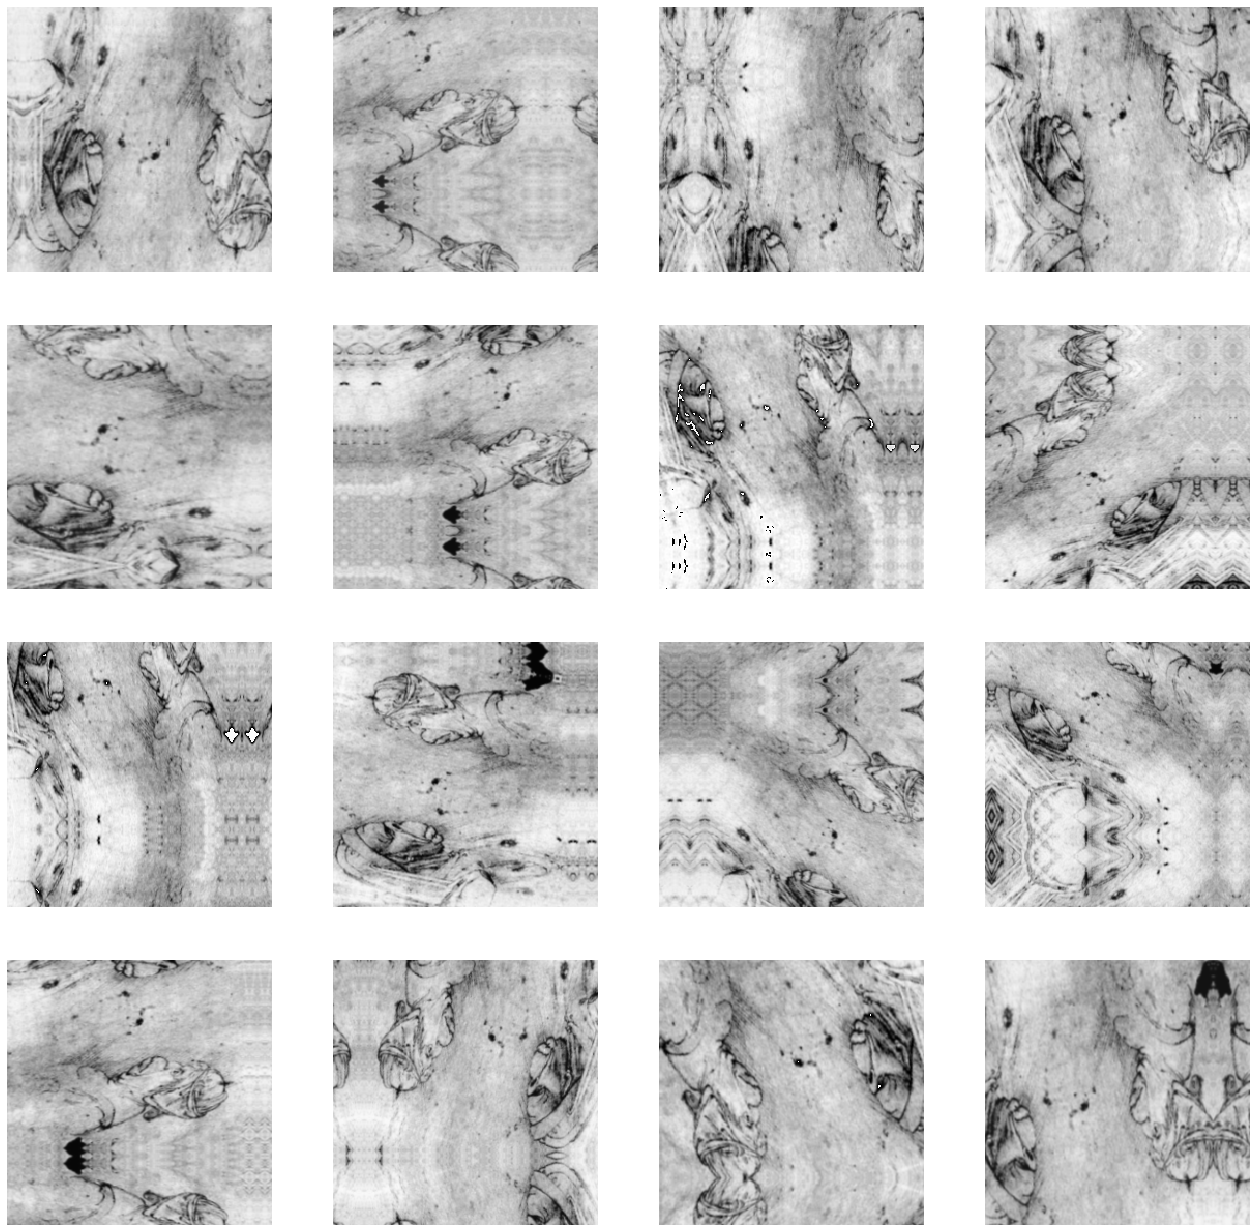

In [17]:
plt.figure(figsize=(22.4, 22.4))
for images, _ in Images.take(1):
    for i in range(16):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [19]:
#https://www.kaggle.com/pankul/image-classification-w-vgg16-weights


num_classes=51
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',"mean_squared_error"])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
epochs =20

history = model.fit_generator(train_generator, epochs=epochs, 
                              validation_data=valid_generator,)
print(history)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Plot history: MAE
plt.plot(history.history['loss'], label='MAE (training_data)')
plt.plot(history.history['val_loss'], label='MAE (validation_data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('No.Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Plot history: MSE
plt.plot(history.history['mean_squared_error'], label='MSE (training_data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation_data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training_data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation_data)')
plt.plot(history.history['accuracy'], label='Accuracy (training_data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation_data)')
plt.title('Model performance for 3D MNIST Keras Conv3D example')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


# Model evaluation